## Dimerization

Make a model of dimerization (that is not reversible)
- t is the time (which will be ignored, but scipy requires us to have it)
- y is the vector of variables P1, P2, and P1P2
- params is the vector of model parameters kbin

Run the model with 
- an initial concentration of 2 for P1, 1 for P2, and 0 for P1P2
- kbin=0.1
- for time steps 0 to 10 (with a step of 0.1)

In [17]:
import numpy as np
import scipy.integrate

def dimer_model(t,y,params):

    kbin = params[0]

    P1 = y[0];
    P2 = y[1]
    P1P2 = y[2]

    dydt = np.zeros( (3,) )
    dydt[0] = - kbin * P1 * P2 
    dydt[1] = - kbin * P1 * P2
    dydt[2] = kbin * P1 * P2
    
    return dydt

params = (0.1,)

# This is a solution we developed in class.
dm = lambda t,y: dimer_model(t,y,params)
sol = scipy.integrate.solve_ivp( fun=dm, t_span=(0,10), y0=(2,1,0), 
                                t_eval=np.arange(0,10,.1) )

# This works for people, but not all.
#sol = scipy.integrate.solve_ivp( fun=dimer_model, t_span=(0,10), y0=(2,1,0), 
#                                t_eval=np.arange(0,10,.1), args=(params,))


Plot the results, labeling as in HW2.

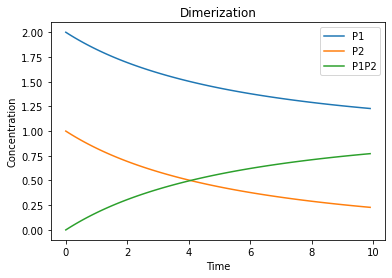

In [18]:
import matplotlib.pyplot as plt

plt.plot( sol.t, sol.y.T )
plt.xlabel( "Time")
plt.ylabel( "Concentration" )
plt.legend( ["P1","P2","P1P2"])
plt.title( "Dimerization");

## Reversible Dimerization

Make a model of dimerization that includes the reverse reaction
- t is the time (which will be ignored, but scipy requires us to have it)
- y is the vector of variables P1, P2, and P1P2
- params is the vector of model parameters kbin and kunbin

Run the model with 
- an initial concentration of 2 for P1, 1 for P2, and 0 for P1P2
- kbin=0.1, kunbin=0.05
- for time steps 0 to 10 (with a step of 0.1)

In [15]:
def dimer_model_with_reverse( t, y, params ):
    kbin = params[0]
    k2 = params[1]

    P1 = y[0]
    P2 = y[1]
    P1P2 = y[2]

    dydt = np.zeros( (3,) )
    dydt[0] = - kbin * P1 * P2 + k2 * P1P2
    dydt[1] = - kbin * P1 * P2 + k2 * P1P2
    dydt[2] = kbin * P1 * P2 - k2*P1P2
    
    return dydt

params = (0.1,0.0)
dm = lambda t,y: dimer_model_with_reverse(t,y,params)
sol = scipy.integrate.solve_ivp( fun=dm, t_span=(0,10), y0=(2,1,0), 
                                t_eval=np.arange(0,10,.1) )

#sol = scipy.integrate.solve_ivp( fun=dimer_model_with_reverse, t_span=(0,10), y0=(2,1,0), 
#                                t_eval=np.arange(0,10,.1), args=(params,))

Plot it.

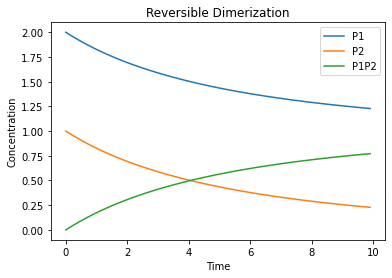

In [16]:
plt.plot( sol.t, sol.y.T )
plt.xlabel( "Time")
plt.ylabel( "Concentration" )
plt.legend( ["P1","P2","P1P2"])
plt.title( "Reversible Dimerization");